<a href="https://colab.research.google.com/github/GautamChaurasia/Grip-DS-Internship/blob/main/Task2(Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-1: Importing Libraries and Data pre-processing

In [33]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
print("Libraries imported successfully!")

Libraries imported successfully!


In [34]:
# importing the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # display the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# extracting Independent variable
x = iris_df.iloc[:, :].values # all the rows and columns
# above line of code returns an array of data.

print(x[:6]) # display th first 5 rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


# Step-2: Finding optimal number of clusters using the elbow method

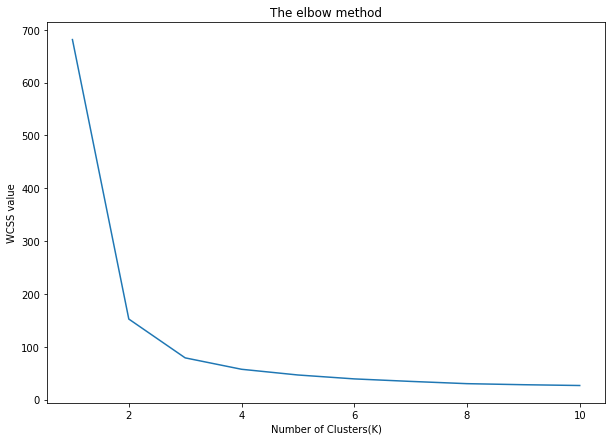

In [36]:
# finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] # initializing the list for the values of WCSS

# calculating WCSS for different number of clusters.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# plotting the WCSS results,
plt.figure(figsize=(10,7)) 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS value') # Within cluster sum of squares
plt.show()

In the above graph a sudden and sharp change(elbow like formation) is seen at K value 3. Thus it is considered to be the optimum number of clusters.

# Step- 3: Training K-means algorithm on the training dataset

In [37]:
# training the K-means model on our dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) # with number of clusters = 3
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans) # display the classification result for training data

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# Step-4: Visualizing the Clusters

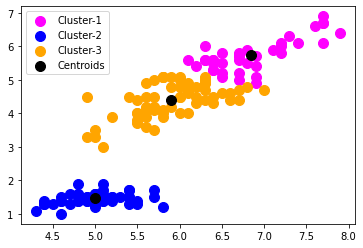

In [38]:
# visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], 
            s = 100, c = 'magenta', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], 
            s = 100, c = 'blue', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2],
            s = 100, c = 'orange', label = 'Cluster-3')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

#Conclusion
3 clusters are formed based on the sepal and petal dimensions each one depicting a different species of plant.